<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [80]:
# import piplite
# await piplite.install(['numpy'])
# await piplite.install(['pandas'])
# await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [81]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

This function is to plot the confusion matrix.


In [82]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [83]:
!pip install requests

In [84]:
import requests
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)
response.raise_for_status()  # Raise an error for bad status codes

data = io.StringIO(response.text)  # Create a file-like object from the content


In [85]:
import pandas as pd

# Create a DataFrame from the CSV content
df = pd.read_csv(data)

# Display the first few rows of the DataFrame
print(df.head())


   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

In [86]:
data = df.copy()

In [87]:
# from js import fetch
# import io

# URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/# datasets/dataset_part_2.csv"
# resp1 = await fetch(URL1)
# text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
# data = pd.read_csv(text1)

In [88]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = requests.get(URL2)
resp2.raise_for_status()
text2 = io.StringIO(resp2.text)
X = pd.read_csv(text2)

In [89]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 83 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   Block                                90 non-null     float64
 4   ReusedCount                          90 non-null     float64
 5   Orbit_ES-L1                          90 non-null     float64
 6   Orbit_GEO                            90 non-null     float64
 7   Orbit_GTO                            90 non-null     float64
 8   Orbit_HEO                            90 non-null     float64
 9   Orbit_ISS                            90 non-null     float64
 10  Orbit_LEO                            90 non-null     float64
 11  Orbit_MEO                         

In [90]:
X.head(10)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,6.0,3325.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
6,7.0,2296.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,8.0,1316.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
8,9.0,4535.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9,10.0,4428.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [91]:
Y = data['Class'].to_numpy()

print(type(Y))
print(Y.shape)
print(Y[:20])

<class 'numpy.ndarray'>
(90,)
[0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [92]:
# students get this 
scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)


In [93]:
print("Mean for each column: \n", scaler.mean_)


Mean for each column: 
 [4.55000000e+01 6.10495941e+03 1.78888889e+00 3.50000000e+00
 1.65555556e+00 1.11111111e-02 1.11111111e-02 3.00000000e-01
 1.11111111e-02 2.33333333e-01 7.77777778e-02 3.33333333e-02
 1.00000000e-01 1.11111111e-02 5.55555556e-02 1.55555556e-01
 6.11111111e-01 2.44444444e-01 1.44444444e-01 1.44444444e-01
 2.22222222e-02 3.88888889e-01 2.22222222e-02 1.33333333e-01
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 2.22222222e-02
 1.11111111e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02
 1.11111111e-02 2.22222222e-02 1.11111111e-02 2.22222222e-02
 2.22222222e-02 1.11111111e-02 2.22222222e-02 2.22222222e-02
 1.11111111e-02 1.11111111e-02 2.22222222e-02 2.22222222e-02
 2.22222222e-02 1.11111111e-02 1.11111111e-02 1.11111111e-02


In [94]:
print("STDeviation for each column: \n", scaler.scale_)

STDeviation for each column: 
 [2.59791583e+01 4.66851736e+03 1.20641291e+00 1.58640054e+00
 1.70072606e+00 1.04822013e-01 1.04822013e-01 4.58257569e-01
 1.04822013e-01 4.22952585e-01 2.67821573e-01 1.79505494e-01
 3.00000000e-01 1.04822013e-01 2.29061424e-01 3.62433476e-01
 4.87498022e-01 4.29757325e-01 3.51539823e-01 3.51539823e-01
 1.47405546e-01 4.87498022e-01 1.47405546e-01 3.39934634e-01
 1.04822013e-01 1.04822013e-01 1.04822013e-01 1.04822013e-01
 1.04822013e-01 1.04822013e-01 1.04822013e-01 1.04822013e-01
 1.04822013e-01 1.04822013e-01 1.04822013e-01 1.04822013e-01
 1.04822013e-01 1.04822013e-01 1.04822013e-01 1.04822013e-01
 1.04822013e-01 1.04822013e-01 1.04822013e-01 1.47405546e-01
 1.04822013e-01 1.04822013e-01 1.04822013e-01 1.04822013e-01
 1.04822013e-01 1.47405546e-01 1.04822013e-01 1.47405546e-01
 1.47405546e-01 1.04822013e-01 1.47405546e-01 1.47405546e-01
 1.04822013e-01 1.04822013e-01 1.47405546e-01 1.47405546e-01
 1.47405546e-01 1.04822013e-01 1.04822013e-01 1.048220

In [95]:
print(X.shape)
print(X_scaled.shape)
print(type(X_scaled))

(90, 83)
(90, 83)
<class 'numpy.ndarray'>


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [96]:
# help(train_test_split)

In [97]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

for i in X_train, X_test, Y_train, Y_test:
    print(i.shape)

(72, 83)
(18, 83)
(72,)
(18,)


we can see we only have 18 test samples.


In [98]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [99]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [100]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()


In [101]:
# GridSearchCV(estimator=SVC(),
#  param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)
sorted(clf.cv_results_.keys())

In [102]:
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [103]:
# sorted(clf.cv_results_.keys())
logreg_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [104]:
cv_results = pd.DataFrame(logreg_cv.cv_results_)
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean_fit_time      3 non-null      float64
 1   std_fit_time       3 non-null      float64
 2   mean_score_time    3 non-null      float64
 3   std_score_time     3 non-null      float64
 4   param_C            3 non-null      float64
 5   param_penalty      3 non-null      object 
 6   param_solver       3 non-null      object 
 7   params             3 non-null      object 
 8   split0_test_score  3 non-null      float64
 9   split1_test_score  3 non-null      float64
 10  split2_test_score  3 non-null      float64
 11  split3_test_score  3 non-null      float64
 12  split4_test_score  3 non-null      float64
 13  split5_test_score  3 non-null      float64
 14  split6_test_score  3 non-null      float64
 15  split7_test_score  3 non-null      float64
 16  split8_test_score  3 non-null 

In [105]:
cv_results.iloc[:,:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C
0,0.009984,0.001883,0.002588,0.000833,0.01
1,0.012201,0.003636,0.003656,0.000968,0.10
2,0.015679,0.003594,0.003731,0.001476,1.00


In [106]:
cv_results.iloc[:,6:11]

,param_solver,params,split0_test_score,split1_test_score,split2_test_score
0,lbfgs,"{'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}",0.750,0.875,0.571429
1,lbfgs,"{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.875,0.875,0.571429
2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.875,0.750,0.571429


In [107]:
print(logreg_cv.best_estimator_)  # The model with the best found parameters
print("Accuracy: ", logreg_cv.best_score_)      # The best mean cross-validation score
print(logreg_cv.best_params_)     # The parameter set for the best model


LogisticRegression(C=0.1)
Accuracy:  0.8035714285714285
{'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}


In [108]:
# help(GridSearchCV)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [109]:
# GridSearchCV(estimator=SVC(),
# param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [110]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8035714285714285


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [111]:
accuracy_score = logreg_cv.score(X_test, Y_test)

In [112]:
from sklearn.metrics import accuracy_score

predictions_y = logreg_cv.predict(X_test)

print(type(predictions_y))
print(predictions_y[1:20]) 

acc_pred_score = accuracy_score(predictions_y, Y_test)
print(acc_pred_score)

<class 'numpy.ndarray'>
[1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1]
0.9444444444444444


Lets look at the confusion matrix:


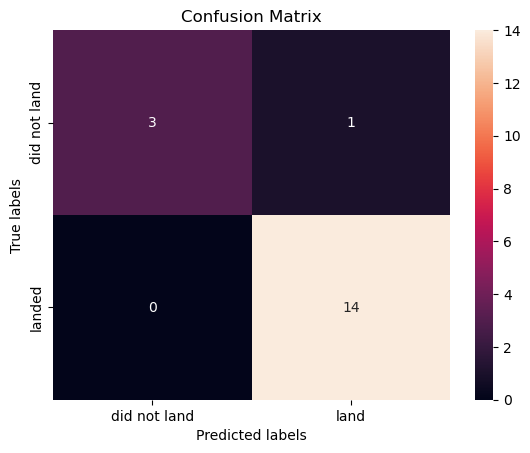

In [113]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

|             | Predicted 0 | Predicted 1 |
|-------------|:-----------:|:-----------:|
| **Actual 0**|     TN      |     FP      |
| **Actual 1**|     FN      |     TP      |


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


In [114]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(Y_test, yhat, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score    support
0              1.000000  0.750000  0.857143   4.000000
1              0.933333  1.000000  0.965517  14.000000
accuracy       0.944444  0.944444  0.944444   0.944444
macro avg      0.966667  0.875000  0.911330  18.000000
weighted avg   0.948148  0.944444  0.941434  18.000000


In [115]:
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(Y_test, yhat)

# If you know your class labels (for example, [0, 1] or ['cat', 'dog'])
labels = logreg_cv.classes_  # or specify manually: labels = ['class1', 'class2']

# Create a pandas DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

# Here, 3 is the count of true negatives, 
# 13 is true positives, 1 is false positives, and 1 is false negatives.

   0   1
0  3   1
1  0  14


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [116]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [117]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10 )
svm_cv.fit(X_train, Y_train)
    
# print(type(svm_cv))
# print(svm_cv)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [118]:
print("tuned hpyerparameters :(best parameters) \n ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters) 
  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.832142857142857


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [119]:
svm_score = svm_cv.score(X_test, Y_test)
print(svm_score)

0.8888888888888888


We can plot the confusion matrix


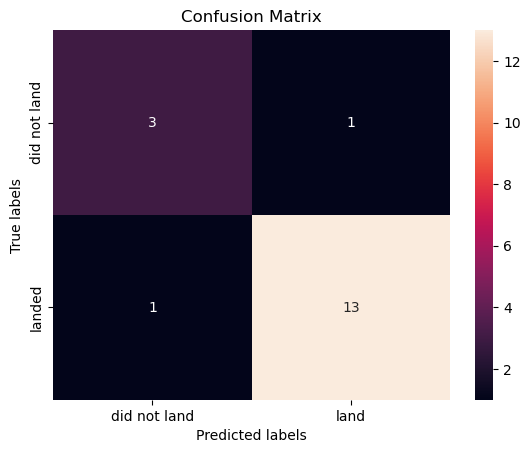

In [120]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

|             | Predicted 0 | Predicted 1 |
|-------------|:-----------:|:-----------:|
| **Actual 0**|     TN      |     FP      |
| **Actual 1**|     FN      |     TP      |


In [121]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(Y_test, yhat, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print(df_report)

              precision    recall  f1-score    support
0              0.750000  0.750000  0.750000   4.000000
1              0.928571  0.928571  0.928571  14.000000
accuracy       0.888889  0.888889  0.888889   0.888889
macro avg      0.839286  0.839286  0.839286  18.000000
weighted avg   0.888889  0.888889  0.888889  18.000000


In [122]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(Y_test, yhat)

# If you know your class labels (for example, [0, 1] or ['cat', 'dog'])
labels = svm_cv.classes_  # or specify manually: labels = ['class1', 'class2']

# Create a pandas DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

# Here, 3 is the count of true negatives, 
# 13 is true positives, 1 is false positives, and 1 is false negatives.



   0   1
0  3   1
1  1  13


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [123]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': [None, 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
# replaced auto with none
# auto' is not a valid value for max_features 
# in DecisionTreeClassifier (it is valid for RandomForestClassifier, where it means "sqrt").

tree = DecisionTreeClassifier()

In [124]:
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': [None, 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [125]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
accuracy : 0.8767857142857143


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [126]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

We can plot the confusion matrix


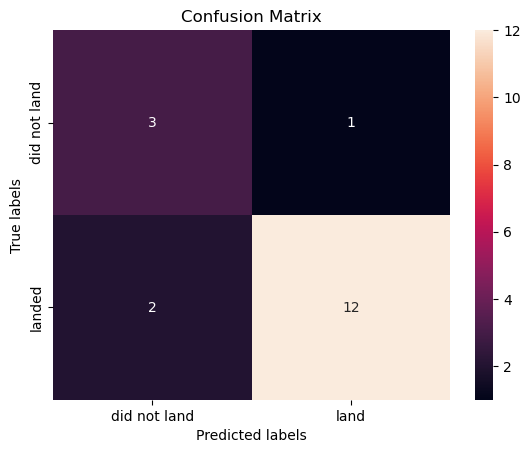

<Figure size 640x480 with 0 Axes>

In [127]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)
# plt.savefig(r"C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\SpaceX\images\confusion_matrix.png")


|             | Predicted 0 | Predicted 1 |
|-------------|:-----------:|:-----------:|
| **Actual 0**|     TN      |     FP      |
| **Actual 1**|     FN      |     TP      |


In [128]:
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(Y_test, yhat, output_dict=True)
df_report = pd.DataFrame(report).transpose()
print("Classification report of decision tree model")
print(df_report)

Classification report of decision tree model
              precision    recall  f1-score    support
0              0.600000  0.750000  0.666667   4.000000
1              0.923077  0.857143  0.888889  14.000000
accuracy       0.833333  0.833333  0.833333   0.833333
macro avg      0.761538  0.803571  0.777778  18.000000
weighted avg   0.851282  0.833333  0.839506  18.000000


In [129]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
cm = confusion_matrix(Y_test, yhat)

# If you know your class labels (for example, [0, 1] or ['cat', 'dog'])
labels = tree_cv.classes_  # or specify manually: labels = ['class1', 'class2']

# Create a pandas DataFrame
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

# Here, 3 is the count of true negatives, 
# 13 is true positives, 1 is false positives, and 1 is false negatives.



   0   1
0  3   1
1  2  12


In [130]:
X.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS',
       'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO',
       'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A',
       'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005',
       'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005',
       'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010',
       'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015',
       'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019',
       'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023',
       'Serial_B1025', 'Serial_B1026', 'Serial_B1028', 'Serial_B102

[0 1]
['0', '1']


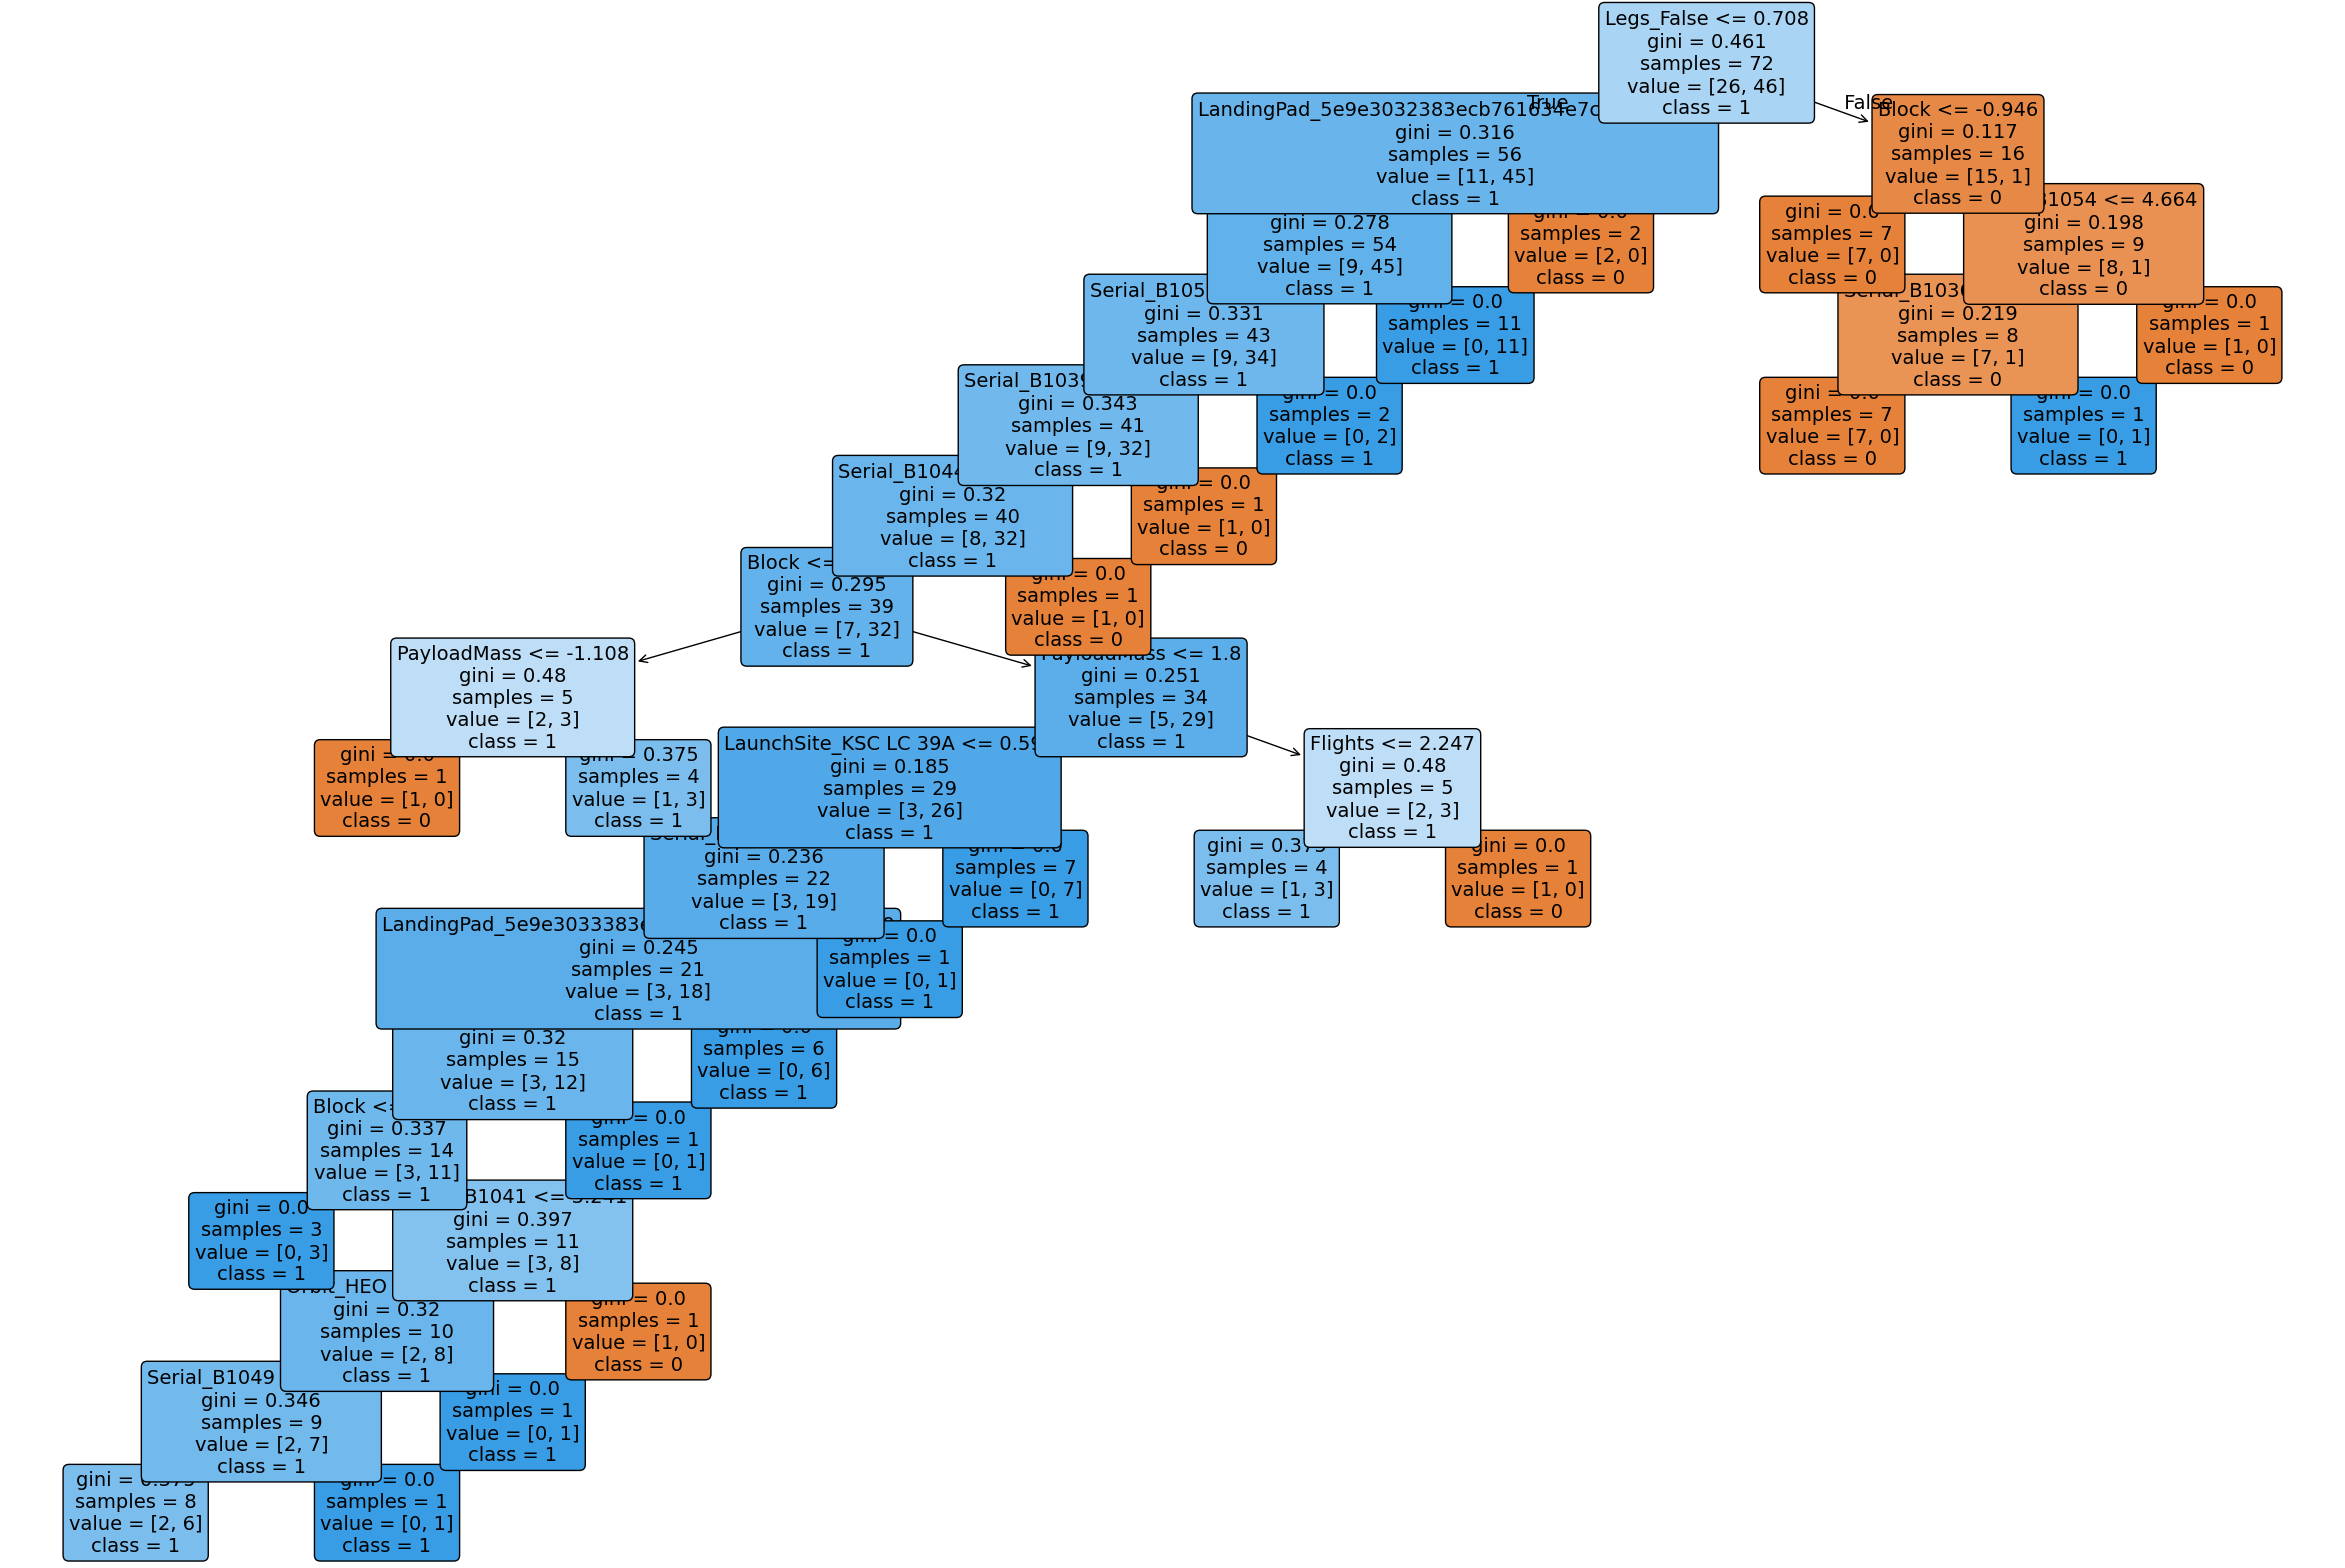

In [131]:
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Extract the best decision tree model from GridSearchCV
best_tree = tree_cv.best_estimator_
print(best_tree.classes_)
class_names = [str(label) for label in best_tree.classes_]
print(class_names)

# Visualize the tree
plt.figure(figsize=(30, 20))
plot_tree(best_tree, 
          feature_names=X.columns,  # Replace with your feature names
          class_names=class_names,  # Replace with your target class names
          filled=True, 
          rounded=True,
          fontsize=14)


plt.savefig(r"C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\SpaceX\images\decision_tree_plot.png")
plt.show()



## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [132]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [133]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [134]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569


|             | Predicted 0 | Predicted 1 |
|-------------|:-----------:|:-----------:|
| **Actual 0**|     TN      |     FP      |
| **Actual 1**|     FN      |     TP      |


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [135]:
print("accuracy :",knn_cv.best_score_)

accuracy : 0.8446428571428569


We can plot the confusion matrix


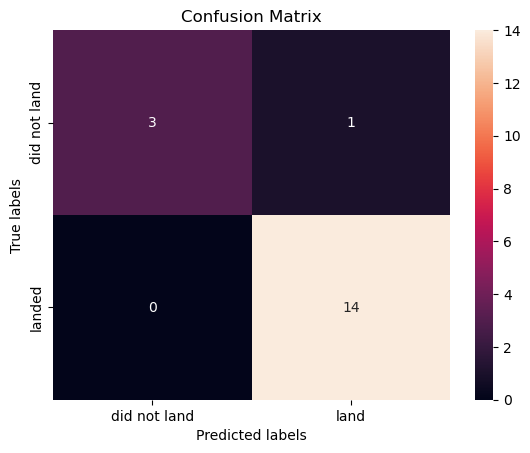

In [136]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

|             | Predicted 0 | Predicted 1 |
|-------------|:-----------:|:-----------:|
| **Actual 0**|     TN      |     FP      |
| **Actual 1**|     FN      |     TP      |


## TASK  12


Find the method performs best:


In [137]:
print("Logistic Regression best score:", logreg_cv.best_score_)
print("SVM best score:", svm_cv.best_score_)
print("Decision Tree best score:", tree_cv.best_score_)
print("accuracy :",knn_cv.best_score_)

Logistic Regression best score: 0.8035714285714285
SVM best score: 0.832142857142857
Decision Tree best score: 0.8767857142857143
accuracy : 0.8446428571428569


In [138]:
# help(pd.DataFrame)

In [139]:
dict_scores = {"Logistic Regression": logreg_cv.best_score_ ,  
               "SVM":svm_cv.best_score_ , 
               "Decision Tree": tree_cv.best_score_, "KNN": knn_cv.best_score_}

print(dict_scores)

scores_df = pd.DataFrame(list(dict_scores.items()), columns=['Model', 'BestScore']).\
sort_values(by="BestScore", ascending=False)

print(scores_df)


{'Logistic Regression': np.float64(0.8035714285714285), 'SVM': np.float64(0.832142857142857), 'Decision Tree': np.float64(0.8767857142857143), 'KNN': np.float64(0.8446428571428569)}
                 Model  BestScore
2        Decision Tree   0.876786
3                  KNN   0.844643
1                  SVM   0.832143
0  Logistic Regression   0.803571


In [140]:
# help(plt.grid)

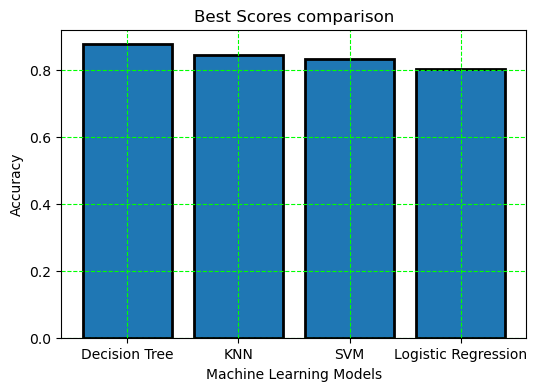

In [141]:
plt.figure(figsize=(6, 4))
plt.bar(scores_df.Model, scores_df.BestScore, edgecolor="black", linewidth=2)
plt.title("Best Scores comparison")
plt.grid(ls="--", color='lime', rasterized=True)
plt.xlabel('Machine Learning Models')
plt.ylabel("Accuracy")
plt.savefig(r"C:\Users\gamarandor\data_science\data_science_projects\data_camp_projects\SpaceX\images\best_scores.png")

plt.show()


The Decision Tree model performs best among these three according to the cross-validation scores.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
